### Environment set up:


In [ ]:
!pip install geopandas

import pandas as pd
import numpy as np
import geopandas as gpd

import matplotlib.pyplot as plt
# import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

### Read in dataset and drop unnecessary columns:

In [ ]:
food_df = pd.read_csv("food_access_research_atlas.csv", header=0)
states_df = pd.read_csv("csvData.csv", header = 0)
food_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72864 entries, 0 to 72863
Columns: 147 entries, CensusTract to TractSNAP
dtypes: float64(112), int64(33), object(2)
memory usage: 81.7+ MB


In [ ]:
states_df 


,State,Abbrev,Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA
5,Colorado,Colo.,CO
6,Connecticut,Conn.,CT
7,Delaware,Del.,DE
8,District of Columbia,D.C.,DC
9,Florida,Fla.,FL


In [ ]:
food_full_df = pd.read_csv("food_access_research_atlas.csv", header=0)
food_full_df['Food Insecurity Percentage'] = food_full_df['LAPOP1_10'] / food_full_df['POP2010']
food_df.drop(columns=['State', 'County'], axis = 1, inplace=True)
food_full_df['Food Insecurity Percentage']


0        0.709980
1        0.222779
2        0.420360
3        0.310868
4        0.245504
           ...   
72859    0.271169
72860    0.000000
72861    0.061109
72862    0.256337
72863    0.353439
Name: Food Insecurity Percentage, Length: 72864, dtype: float64

In [ ]:
food_full_df['County'] = food_full_df['County'].str.title()
food_full_df['County'] = food_full_df['County'].str.strip()
food_full_df['State'] = food_full_df['State'].str.title()
food_full_df['State'] = food_full_df['State'].str.strip()
food_full_df['County'] = food_full_df['County'].apply(lambda x: ((str) (x)).replace(' County', ''))

food_full_df = food_full_df.merge(states_df, how = "left", left_on = 'State',  right_on = 'State')
food_full_df = food_full_df.drop(['State'], axis = 1)
food_full_df = food_full_df.rename(columns = {'Code' : 'State'})


In [ ]:
food_full_df = food_full_df.groupby(['State','County']).mean().reset_index()


food_full_df['GroupQuartersFlag'] = food_full_df['GroupQuartersFlag'].apply(lambda x: 1 if x > 0 else 0)
food_full_df['LILATracts_1And10'] = food_full_df['LILATracts_1And10'].apply(lambda x: 1 if x > 0 else 0)
food_full_df['LILATracts_halfAnd10'] = food_full_df['LILATracts_halfAnd10'].apply(lambda x: 1 if x > 0 else 0)
food_full_df['LILATracts_1And20'] = food_full_df['LILATracts_1And20'].apply(lambda x: 1 if x > 0 else 0)
food_full_df['LILATracts_Vehicle'] = food_full_df['LILATracts_Vehicle'].apply(lambda x: 1 if x > 0 else 0)
food_full_df['HUNVFlag'] = food_full_df['HUNVFlag'].apply(lambda x: 1 if x > 0 else 0)
food_full_df['LowIncomeTracts'] = food_full_df['LowIncomeTracts'].apply(lambda x: 1 if x > 0 else 0)
food_full_df['LA1and10'] = food_full_df['LA1and10'].apply(lambda x: 1 if x > 0 else 0)
food_full_df['LAhalfand10'] = food_full_df['LAhalfand10'].apply(lambda x: 1 if x > 0 else 0)
food_full_df['LA1and20'] = food_full_df['LA1and20'].apply(lambda x: 1 if x > 0 else 0)
food_full_df['LATracts_half'] = food_full_df['LATracts_half'].apply(lambda x: 1 if x > 0 else 0)
food_full_df['LATracts1'] = food_full_df['LATracts1'].apply(lambda x: 1 if x > 0 else 0)
food_full_df['LATracts10'] = food_full_df['LATracts10'].apply(lambda x: 1 if x > 0 else 0)
food_full_df['LATracts20'] = food_full_df['LATracts20'].apply(lambda x: 1 if x > 0 else 0)
food_full_df['LATractsVehicle_20'] = food_full_df['LATractsVehicle_20'].apply(lambda x: 1 if x > 0 else 0)

food_full_df

,State,County,CensusTract,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,LILATracts_Vehicle,HUNVFlag,LowIncomeTracts,PovertyRate,MedianFamilyIncome,LA1and10,LAhalfand10,LA1and20,LATracts_half,LATracts1,LATracts10,LATracts20,LATractsVehicle_20,LAPOP1_10,LAPOP05_10,LAPOP1_20,LALOWI1_10,LALOWI05_10,LALOWI1_20,lapophalf,lapophalfshare,lalowihalf,lalowihalfshare,lakidshalf,lakidshalfshare,laseniorshalf,laseniorshalfshare,lawhitehalf,...,lasnap10share,lapop20,lapop20share,lalowi20,lalowi20share,lakids20,lakids20share,laseniors20,laseniors20share,lawhite20,lawhite20share,lablack20,lablack20share,laasian20,laasian20share,lanhopi20,lanhopi20share,laaian20,laaian20share,laomultir20,laomultir20share,lahisp20,lahisp20share,lahunv20,lahunv20share,lasnap20,lasnap20share,TractLOWI,TractKids,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,Food Insecurity Percentage
0,AK,0,2.195420e+09,0.000000,1971.142857,816.857143,0,16.000000,0.006691,1,1,1,1,1,1,17.471429,56230.428571,1,1,1,0,0,1,1,1,639.360213,639.360213,473.211919,256.903864,256.903864,203.449576,1549.712511,0.858231,525.445383,0.395615,361.949000,0.186098,181.230941,0.110976,921.339504,...,0.062957,473.211919,0.377740,203.449576,0.242220,94.148270,0.063633,61.844243,0.059671,259.400555,0.255637,1.950974,0.000995,2.330787,0.001048,0.904258,0.002071,165.328900,0.086731,43.296443,0.031257,14.400930,0.010396,52.650060,0.141740,38.122876,0.045951,672.857143,463.571429,235.142857,1176.428571,6.285714,23.571429,4.285714,574.142857,186.428571,52.714286,127.571429,145.285714,0.463625
1,AK,Aleutians East,2.013000e+09,0.000000,3141.000000,553.000000,0,1726.000000,0.549507,1,1,1,1,1,1,16.400000,63250.000000,1,1,1,0,0,1,1,1,2203.000030,2203.000030,2045.077214,1097.387178,1097.387178,1018.825346,3048.207118,0.970458,1473.436540,0.469098,360.574491,0.114796,151.500529,0.048233,637.980393,...,0.097931,2045.077214,0.651091,1018.825346,0.324363,191.999996,0.061127,92.999999,0.029608,418.863625,0.133354,208.000006,0.066221,784.999992,0.249920,17.000000,0.005412,464.142366,0.147769,152.071183,0.048415,274.000003,0.087233,64.859236,0.117286,44.340431,0.080182,1573.000000,371.000000,155.000000,660.000000,219.000000,1130.000000,19.000000,876.000000,237.000000,385.000000,124.000000,84.000000,0.701369
2,AK,Aleutians West,2.016000e+09,0.000000,2780.500000,606.000000,0,1271.500000,0.427173,1,1,1,1,0,1,11.400000,76654.000000,1,1,1,0,0,1,1,1,598.067371,598.067371,592.500005,231.593239,231.593239,229.983554,2318.140066,0.894342,759.302198,0.315038,350.912551,0.142957,85.271924,0.042562,861.704781,...,0.061546,592.500005,0.500000,229.983554,0.194079,101.999999,0.086076,37.500000,0.031646,144.500002,0.121941,16.000000,0.013502,89.000003,0.075105,3.500000,0.002954,294.499998,0.248523,45.000000,0.037975,30.000000,0.025316,49.761905,0.174603,17.529762,0.061508,890.000000,407.500000,96.500000,1002.000000,166.000000,803.000000,51.500000,428.500000,329.500000,363.000000,88.000000,39.000000,0.501272
3,AK,Anchorage,2.020002e+09,0.945455,5305.927273,1951.490909,0,153.636364,0.033210,1,1,1,1,1,1,8.638182,91073.018182,1,1,1,1,1,0,0,1,1597.668894,3655.839064,1589.106415,289.377366,767.443716,288.186751,3819.101339,0.717523,788.251088,0.152294,993.990801,0.178566,265.408909,0.053082,2620.147861,...,0.000134,0.335611,0.000059,0.055295,0.000010,0.033561,0.000006,0.008390,0.000001,0.276879,0.000048,0.000000,0.000000,0.008390,0.000001,0.000000,0.000000,0.000000,0.000000,0.050342,0.000009,0.000000,0.000000,0.000000,0.000000,0.005260,0.000003,1199.600000,1377.927273,384.345455,3499.963636,295.018182,428.727273,107.290909,420.545455,554.381818,401.109091,114.290909,163.327273,0.298254
4,AK,Bethel,2.050000e+09,0.333333,5671.000000,1550.333333,0,112.666667,0.019754,1,1,1,1,1,1,23.666667,52883.000000,1,1,1,1,1,1,1,1,4587.088856,5079.751592,3842.975319,2594.829334,2721.386922,2077.859236,5265.350587,0.933281,2

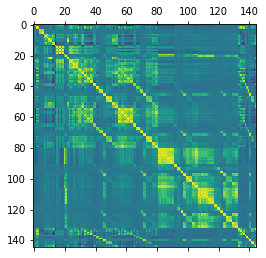

In [ ]:
import matplotlib.pyplot as plt

plt.matshow(food_df.corr())
plt.show()

In [ ]:
from pandas.plotting import scatter_matrix



In [ ]:
food_df.head(10)

,CensusTract,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,LILATracts_Vehicle,HUNVFlag,LowIncomeTracts,PovertyRate,MedianFamilyIncome,LA1and10,LAhalfand10,LA1and20,LATracts_half,LATracts1,LATracts10,LATracts20,LATractsVehicle_20,LAPOP1_10,LAPOP05_10,LAPOP1_20,LALOWI1_10,LALOWI05_10,LALOWI1_20,lapophalf,lapophalfshare,lalowihalf,lalowihalfshare,lakidshalf,lakidshalfshare,laseniorshalf,laseniorshalfshare,lawhitehalf,lawhitehalfshare,lablackhalf,...,lasnap10,lasnap10share,lapop20,lapop20share,lalowi20,lalowi20share,lakids20,lakids20share,laseniors20,laseniors20share,lawhite20,lawhite20share,lablack20,lablack20share,laasian20,laasian20share,lanhopi20,lanhopi20share,laaian20,laaian20share,laomultir20,laomultir20share,lahisp20,lahisp20share,lahunv20,lahunv20share,lasnap20,lasnap20share,TractLOWI,TractKids,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,1001020100,1,1912,693,0,0,0.000000,0,0,0,0,0,0,10.0,74750,1,1,1,1,1,0,0,0,1357.480940,1732.225468,1357.480940,322.084612,411.690754,322.084612,1732.225468,0.905976,411.690754,0.215319,466.426429,0.243947,198.828220,0.103990,1482.881417,0.775566,184.319106,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,448,507,221,1622,217,14,0,14,45,44,26,112
1,1001020200,1,2170,743,0,181,0.083410,0,0,0,0,0,0,18.2,51875,0,1,0,1,0,0,0,0,483.429683,1410.374828,483.429683,145.141418,475.306031,145.141418,1410.374828,0.649942,475.306031,0.219035,448.163512,0.206527,139.305390,0.064196,412.291349,0.189996,945.317796,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,763,606,214,888,1217,5,0,5,55,75,87,202
2,1001020300,1,3373,1256,0,0,0.000000,0,0,0,0,0,0,19.1,52905,1,1,1,1,1,0,0,0,1417.874893,2764.604126,1417.874893,696.636797,1350.176549,696.636797,2764.604126,0.819628,1350.176549,0.400290,744.891575,0.220839,346.203097,0.102640,2114.851375,0.626994,528.050101,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1578,894,439,2576,647,17,5,11,117,87,108,120
3,1001020400,1,4386,1722,0,0,0.000000,0,0,0,0,0,0,3.3,68079,1,1,1,1,1,0,0,0,1363.466885,3651.061015,1363.466885,409.587836,1067.844499,409.587836,3651.061015,0.832435,1067.844499,0.243467,846.613783,0.193026,766.521491,0.174766,3395.061920,0.774068,170.065452,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1241,1015,904,4086,193,18,4,11,74,85,19,82
4,1001020500,1,10766,4082,0,181,0.016812,0,0,0,0,1,0,8.5,77819,1,1,1,1,1,0,0,1,2643.095161,7778.396188,2643.095161,623.076555,1913.453614,623.076555,7778.396188,0.722496,1913.453614,0.177731,2309.475651,0.214516,839.885471,0.078013,6298.710335,0.585056,1000.678496,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2692,3162,1126,8666,1437,296,9,48,310,355,198,488
5,1001020600,1,3668,1311,0,0,0.000000,0,0,0,0,0,0,14.1,67218,1,1,1,1,1,0,0,0,2568.545500,3540.571275,2568.545500,1090.734565,1455.491350,1090.734565,3540.571275,0.965259,1455.491350,0.396808,980.915918,0.267425,391.326837,0.106687,2633.216593,0.717889,737.035544,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1504,1008,411,2751,740,9,1,10,157,176,49,118
6,1001020700,1,2891,1188,0,36,0.012452,1,1,1,1,1,1,26.4,43646,1,1,1,1,1,0,0,1,1230.979862,2236.617224,1230.979862,652.385637,1062.889592,652.385637,2236.617224,0.773648,1062.889592,0.367655,549.715091,0.190147,265.568447,0.091860,1803.428820,0.623808,334.800932,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1240,686,360,2333,435,13,3,11,96,

### Scale dataset to zero mean and unit variance:

In [ ]:
# Save columns as list 
food_columns = list(food_df)

In [ ]:
# Instantiate standard scaler (zero mean & unit variance)
scaler = StandardScaler();

# Scale dataframe (returns as numpy array)
food_scaled_array = scaler.fit_transform(food_df)

# Reconstruct dataframe from scaled array
food_scaled_df = pd.DataFrame(data=food_scaled_array, columns=food_columns)

In [ ]:
food_scaled_df.head(10)

,CensusTract,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,LILATracts_Vehicle,HUNVFlag,LowIncomeTracts,PovertyRate,MedianFamilyIncome,LA1and10,LAhalfand10,LA1and20,LATracts_half,LATracts1,LATracts10,LATracts20,LATractsVehicle_20,LAPOP1_10,LAPOP05_10,LAPOP1_20,LALOWI1_10,LALOWI05_10,LALOWI1_20,lapophalf,lapophalfshare,lalowihalf,lalowihalfshare,lakidshalf,lakidshalfshare,laseniorshalf,laseniorshalfshare,lawhitehalf,lawhitehalfshare,lablackhalf,...,lasnap10,lasnap10share,lapop20,lapop20share,lalowi20,lalowi20share,lakids20,lakids20share,laseniors20,laseniors20share,lawhite20,lawhite20share,lablack20,lablack20share,laasian20,laasian20share,lanhopi20,lanhopi20share,laaian20,laaian20share,laomultir20,laomultir20share,lahisp20,lahisp20share,lahunv20,lahunv20share,lasnap20,lasnap20share,TractLOWI,TractKids,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,-1.696729,0.566277,-1.178848,-1.241410,-0.084452,-0.247493,-0.282337,-0.381206,-0.626881,-0.353774,-0.418713,-0.537111,-0.857383,-0.508221,0.214698,1.283355,0.682158,1.395982,0.752525,1.412730,-0.214499,-0.073168,-0.543979,0.254528,-0.185198,0.293459,0.082338,-0.333333,0.129188,-0.586313,0.655384,-0.640300,-0.086205,-0.425860,0.877225,-0.587376,0.100434,-0.434572,0.772928,-0.226643,...,-0.165400,-0.160019,-0.068255,-0.075471,-0.057532,-0.068108,-0.057517,-0.069597,-0.069093,-0.071408,-0.070535,-0.071199,-0.01517,-0.021595,-0.015339,-0.018476,-0.013712,-0.004792,-0.027831,-0.033488,-0.043953,-0.048781,-0.032945,-0.038114,-0.030484,-0.036098,-0.048675,-0.053196,-0.987845,-0.827063,-0.939545,-0.801450,-0.357370,-0.430705,-0.164386,-0.144969,-0.644654,-0.580358,-0.518489,-0.507631
1,-1.696729,0.566277,-1.048050,-1.173113,-0.084452,0.161159,0.591131,-0.381206,-0.626881,-0.353774,-0.418713,-0.537111,-0.857383,0.126384,-0.456393,-0.779207,0.682158,-0.716342,0.752525,-0.707849,-0.214499,-0.073168,-0.543979,-0.292284,-0.336418,-0.253344,-0.244612,-0.255221,-0.202470,-0.739433,-0.109320,-0.565773,-0.065202,-0.456298,0.473598,-0.765405,-0.427298,-1.022507,-1.031199,0.921954,...,-0.165400,-0.160019,-0.068255,-0.075471,-0.057532,-0.068108,-0.057517,-0.069597,-0.069093,-0.071408,-0.070535,-0.071199,-0.01517,-0.021595,-0.015339,-0.018476,-0.013712,-0.004792,-0.027831,-0.033488,-0.043953,-0.048781,-0.032945,-0.038114,-0.030484,-0.036098,-0.048675,-0.053196,-0.677681,-0.666855,-0.959376,-1.208247,0.769008,-0.451391,-0.164386,-0.194686,-0.625743,-0.552627,-0.253502,-0.026830
2,-1.696729,0.566277,-0.438166,-0.472390,-0.084452,-0.247493,-0.282337,-0.381206,-0.626881,-0.353774,-0.418713,-0.537111,-0.857383,0.196036,-0.426175,1.283355,0.682158,1.395982,0.752525,1.412730,-0.214499,-0.073168,-0.543979,0.292310,0.299859,0.331242,0.774425,0.819006,0.831240,-0.095161,0.397486,0.459165,0.959395,0.038242,0.627979,-0.146587,0.082529,-0.087513,0.315182,0.292160,...,-0.165400,-0.160019,-0.068255,-0.075471,-0.057532,-0.068108,-0.057517,-0.069597,-0.069093,-0.071408,-0.070535,-0.071199,-0.01517,-0.021595,-0.015339,-0.018476,-0.013712,-0.004792,-0.027831,-0.033488,-0.043953,-0.048781,-0.032945,-0.038114,-0.030484,-0.036098,-0.048675,-0.053196,0.124805,-0.200796,-0.321956,-0.272725,0.126973,-0.423810,-0.053483,-0.161541,-0.508490,-0.541892,-0.162277,-0.464893
3,-1.696729,0.566277,0.075394,0.164134,-0.084452,-0.247493,-0.282337,-0.381206,-0.626881,-0.353774,-0.418713,-0.537111,-0.857383,-1.026740,0.018989,1.283355,0.682158,1.395982,0.752525,1.412730,-0.214499,-0.073168,-0.543979,0.258272,0.716356,0.297204,0.244024,0.472339,0.293202,0.326570,0.435738,0.128404,0.072905,0.207777,0.327975,1.110560,1.039043,0.615539,0.768313,-0.248157,...,-0.165400,-0.160019,-0.068255,-0.075471,-0.057532,-0.068108,-0.057517,-0.069597,-0.069093,-0.071408,-0.070535,-0.071199,-0.01517,-0.021595,-0.015339,-0.018476,-0.013712,-0.004792,-0.027831,-0.033488,-0.043953,-0.048781,-0.032945,-0.038114,-0.030484,-0.03609

### Perform Principal Component Analysis (PCA):

In [ ]:
# Instantiate PCA object
pca = PCA(n_components=food_scaled_array.shape[1])

# Fit PCA object to dataframe without transforming (without applying dimensionality reduction)
pca.fit(food_scaled_array)

PCA(n_components=145)

In [ ]:
# See percentage of total variance in data captured by each principal component
print(pca.explained_variance_ratio_)

[1.72436382e-01 1.28857855e-01 7.83910048e-02 6.18785872e-02
 5.18469239e-02 4.16266217e-02 3.67571627e-02 3.59804570e-02
 3.15049295e-02 2.46610291e-02 2.33227904e-02 2.07257270e-02
 1.80805975e-02 1.74272535e-02 1.67284308e-02 1.56104214e-02
 1.46994057e-02 1.23628353e-02 1.21093815e-02 1.09421484e-02
 1.07180737e-02 8.71228105e-03 8.06030720e-03 7.54186989e-03
 7.45672605e-03 7.10950751e-03 6.79094226e-03 6.48638537e-03
 5.71001939e-03 5.31797584e-03 4.83394272e-03 4.66844194e-03
 4.26608721e-03 3.98965590e-03 3.85115074e-03 3.55222538e-03
 3.32313672e-03 3.13754539e-03 3.12731722e-03 2.98390751e-03
 2.93837164e-03 2.87975532e-03 2.68270228e-03 2.58177118e-03
 2.30221520e-03 2.21422185e-03 2.15712636e-03 2.12781423e-03
 2.01270722e-03 1.87520982e-03 1.75188219e-03 1.72709424e-03
 1.62256438e-03 1.55309343e-03 1.47640714e-03 1.46976789e-03
 1.39349730e-03 1.37713929e-03 1.31250410e-03 1.21997441e-03
 1.15722150e-03 1.08531001e-03 1.04857060e-03 1.00282978e-03
 9.04317303e-04 8.529478

[1.72436382e-01 1.28857855e-01 7.83910048e-02 6.18785872e-02
 5.18469239e-02 4.16266217e-02 3.67571627e-02 3.59804570e-02
 3.15049295e-02 2.46610291e-02 2.33227904e-02 2.07257270e-02
 1.80805975e-02 1.74272535e-02 1.67284308e-02 1.56104214e-02
 1.46994057e-02 1.23628353e-02 1.21093815e-02 1.09421484e-02
 1.07180737e-02 8.71228105e-03 8.06030720e-03 7.54186989e-03
 7.45672605e-03 7.10950751e-03 6.79094226e-03 6.48638537e-03
 5.71001939e-03 5.31797584e-03 4.83394272e-03 4.66844194e-03
 4.26608721e-03 3.98965590e-03 3.85115074e-03 3.55222538e-03
 3.32313672e-03 3.13754539e-03 3.12731722e-03 2.98390751e-03
 2.93837164e-03 2.87975532e-03 2.68270228e-03 2.58177118e-03
 2.30221520e-03 2.21422185e-03 2.15712636e-03 2.12781423e-03
 2.01270722e-03 1.87520982e-03 1.75188219e-03 1.72709424e-03
 1.62256438e-03 1.55309343e-03 1.47640714e-03 1.46976789e-03
 1.39349730e-03 1.37713929e-03 1.31250410e-03 1.21997441e-03
 1.15722150e-03 1.08531001e-03 1.04857060e-03 1.00282978e-03
 9.04317303e-04 8.529478

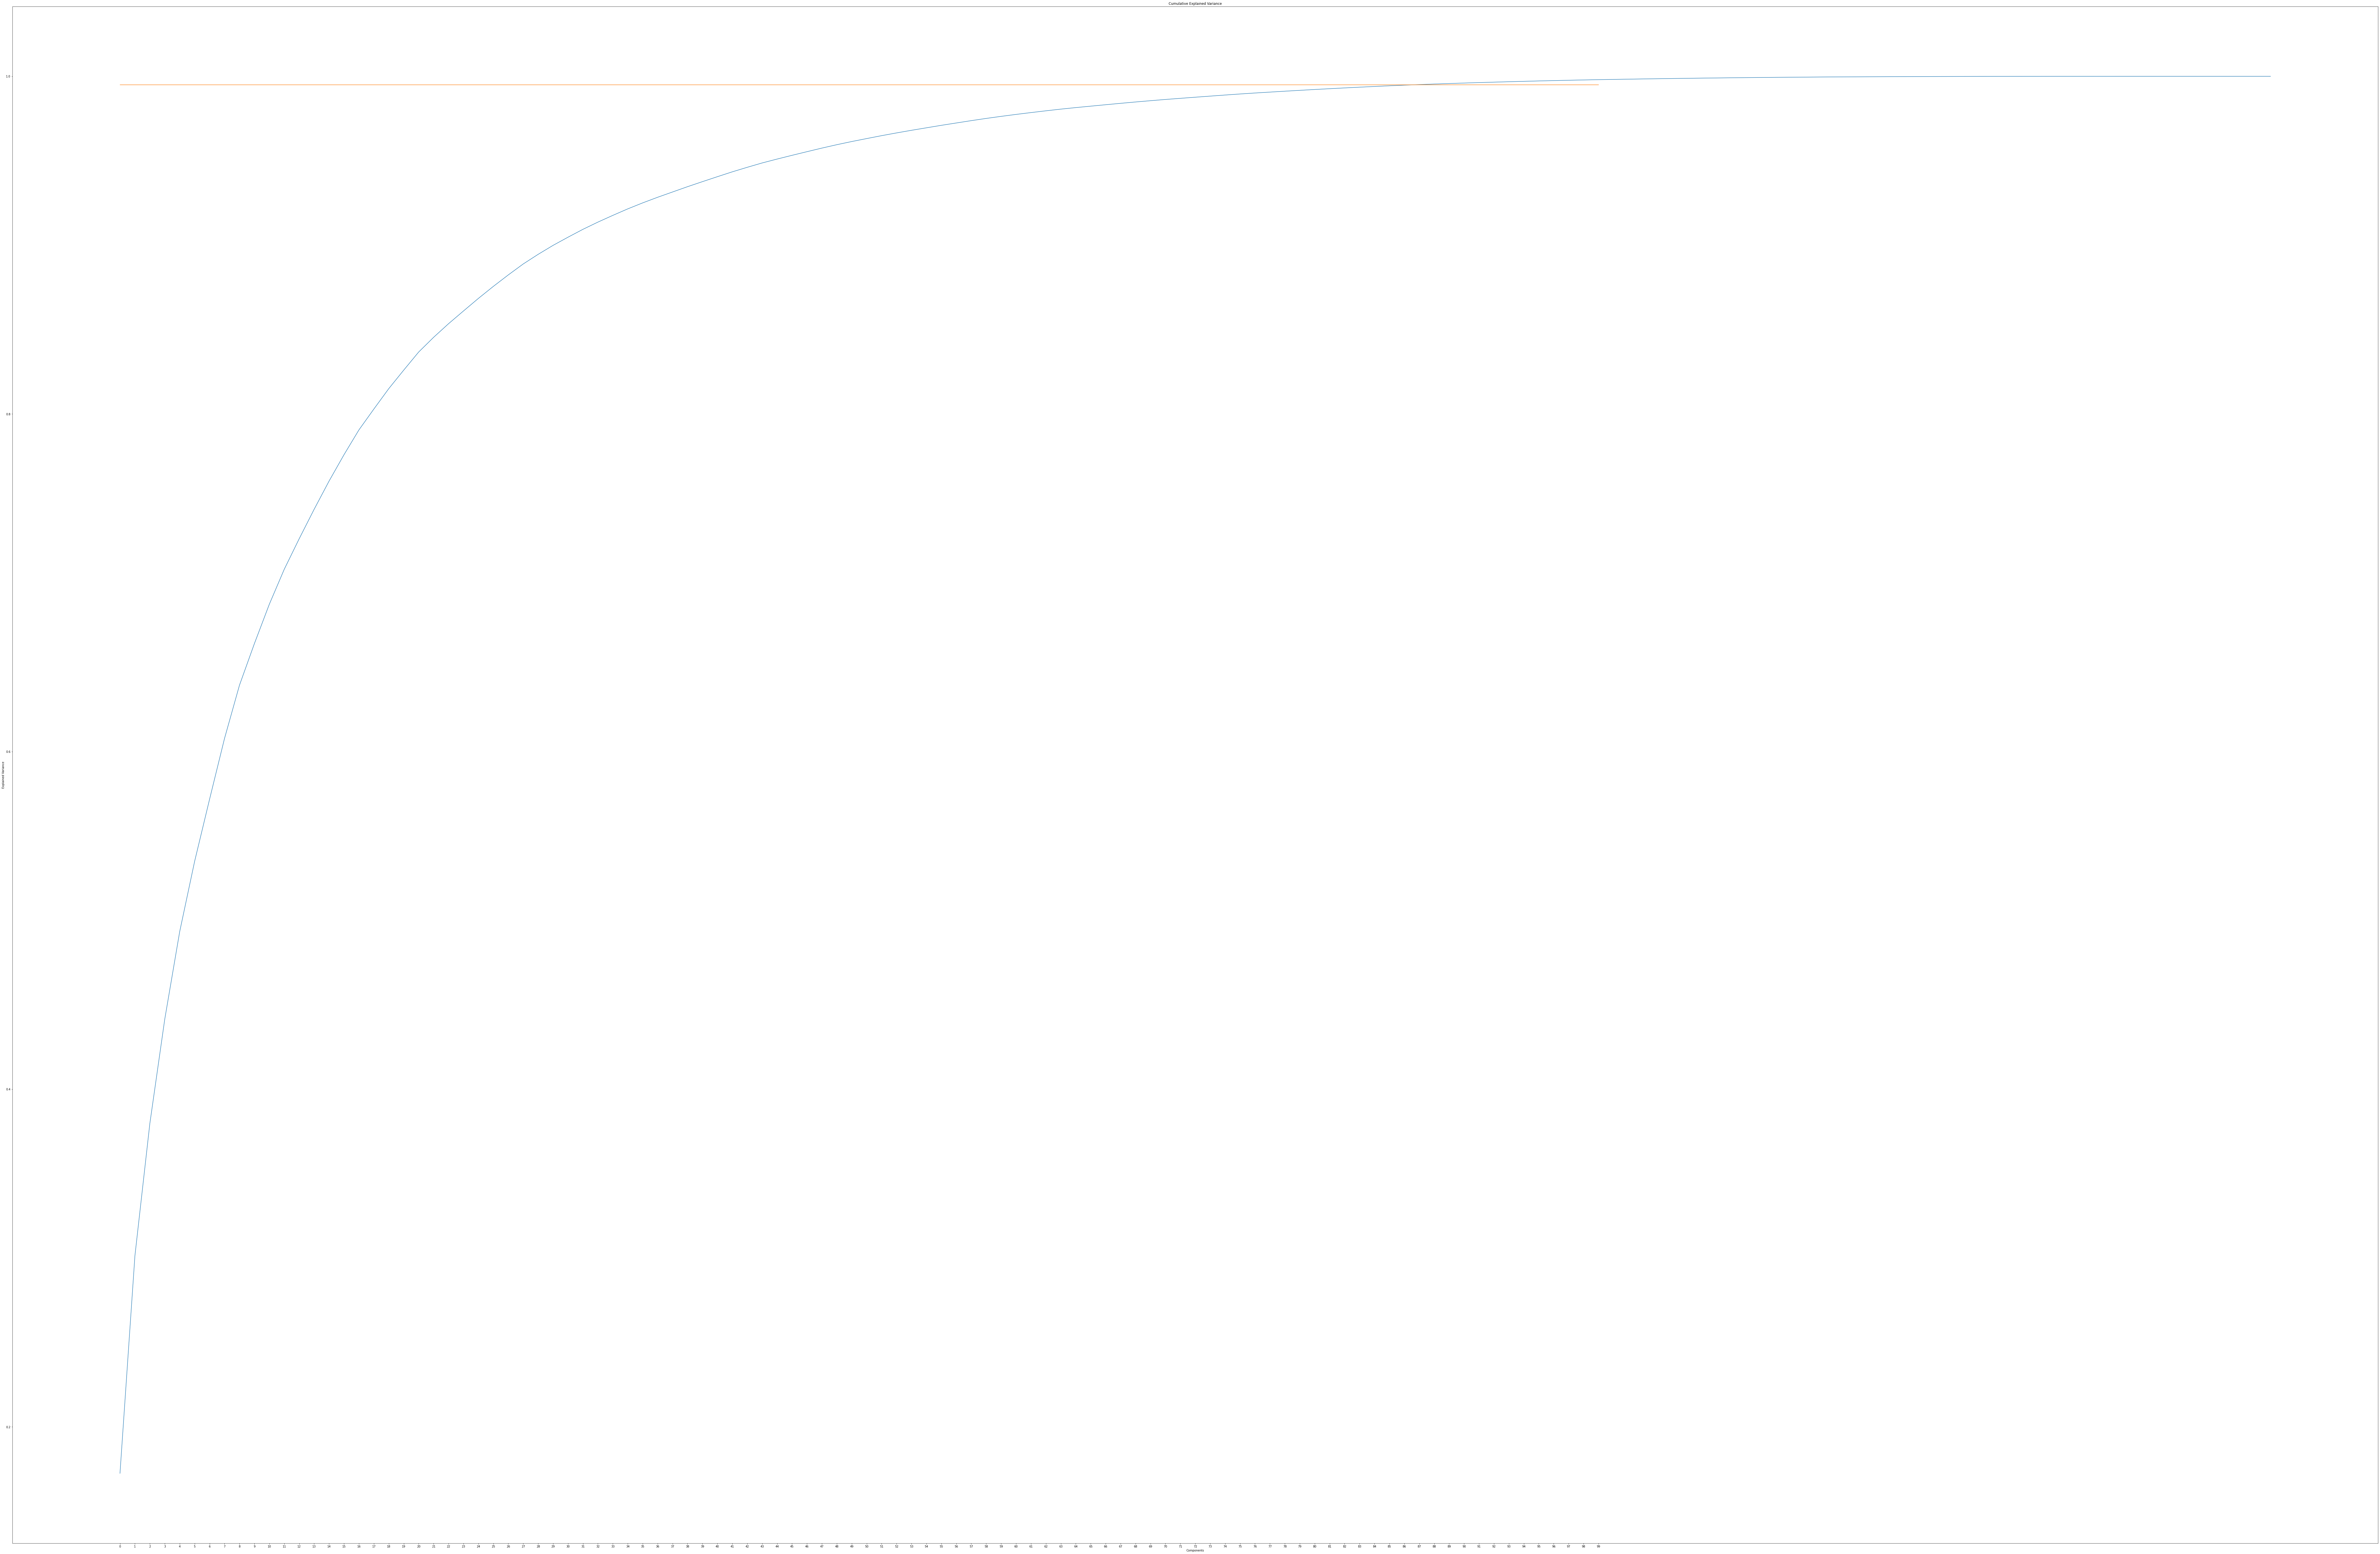

In [ ]:
# Plot cumulative explained variance to find elbow
plt.figure(figsize=(150,100))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xticks(np.arange(0, 100, step=1))
plt.xlabel("Components")
plt.ylabel("Explained Variance")
plt.title("Cumulative Explained Variance")
plt.plot(np.arange(0,100), [0.995]*100)
print(pca.explained_variance_ratio_)

Hits the 90% point at 87 components. 

### Geographic Representation:

In [ ]:
# Name file path
shapefile_path = '/content/cb_2020_us_county_500k.shx'

In [ ]:
# Generate map dataframe
us_county_map_df = gpd.read_file(shapefile_path)
# us_county_map_df

In [ ]:
us_county_map_df.columns

Index(['STATEFP', 'COUNTYFP', 'COUNTYNS', 'AFFGEOID', 'GEOID', 'NAME',
       'NAMELSAD', 'STUSPS', 'STATE_NAME', 'LSAD', 'ALAND', 'AWATER',
       'geometry'],
      dtype='object')

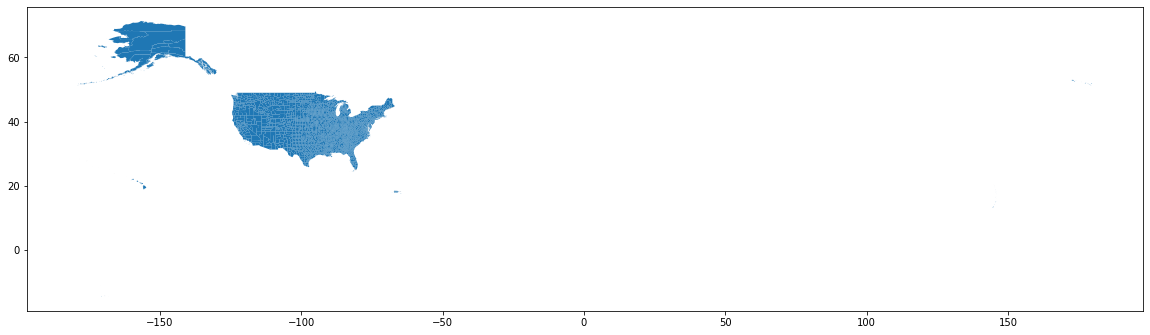

In [ ]:
# Visualize US county map
us_county_map_df.plot(figsize=(20, 10))

In [ ]:
# Remove counties in territories

us_states_county_map_df = us_county_map_df.copy()
us_states_county_map_df.head(10)




,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry
0,21,141,00516917,0500000US21141,21141,Logan,Logan County,KY,Kentucky,06,1430224002,12479211,"POLYGON ((-87.06037 36.68085, -87.06002 36.708..."
1,36,081,00974139,0500000US36081,36081,Queens,Queens County,NY,New York,06,281594050,188444349,"POLYGON ((-73.96262 40.73903, -73.96243 40.739..."
2,34,017,00882278,0500000US34017,34017,Hudson,Hudson County,NJ,New Jersey,06,119640822,41836491,"MULTIPOLYGON (((-74.04220 40.69997, -74.03900 ..."
3,34,019,00882228,0500000US34019,34019,Hunterdon,Hunterdon County,NJ,New Jersey,06,1108086284,24761598,"POLYGON ((-75.19511 40.57969, -75.19466 40.581..."
4,21,147,00516926,0500000US21147,21147,McCreary,McCreary County,KY,Kentucky,06,1105416696,10730402,"POLYGON ((-84.77845 36.60329, -84.73068 36.665..."
5,21,195,00516944,0500000US21195,21195,Pike,Pike County,KY,Kentucky,06,2037621882,4756759,"POLYGON ((-82.73269 37.27150, -82.73063 37.273..."
6,21,127,00516910,0500000US21127,21127,Lawrence,Lawrence County,KY,Kentucky,06,1076387821,11582519,"POLYGON ((-83.02497 37.99269, -83.02365 37.993..."
7,36,009,00974103,0500000US36009,36009,Cattaraugus,Cattaraugus County,NY,New York,06,3388125876,36783591,"POLYGON ((-79.05908 42.08673, -79.05908 42.086..."
8,22,109,00559517,0500000US22109,22109,Terrebonne,Terrebonne Parish,LA,Louisiana,15,3185305317,2207679634,"MULTIPOLYGON (((-90.41444 29.20799, -90.41230 ..."
9,22,031,00558521,0500000US22031,22031,De Soto,De Soto Parish,LA,Louisiana,15,2269991655,46990189,"POLYGON ((-94.04268 32.13796, -94.04268 32.137..."


In [ ]:
us_states_county_map_df.drop(us_county_map_df[us_county_map_df['STATE_NAME'] == 'Puerto Rico'].index, inplace=True)
us_states_county_map_df.drop(us_county_map_df[us_county_map_df['STATE_NAME'] == 'Guam'].index, inplace=True)
us_states_county_map_df.drop(us_county_map_df[us_county_map_df['STATE_NAME'] == 'American Samoa'].index, inplace=True)
us_states_county_map_df.drop(us_county_map_df[us_county_map_df['STATE_NAME'] == 'Commonwealth of the Northern Mariana Islands'].index, inplace=True)
us_states_county_map_df.drop(us_county_map_df[us_county_map_df['STATE_NAME'] == 'United States Virgin Islands'].index, inplace=True)


In [ ]:
us_states_county_map_df[us_county_map_df['STATE_NAME'] == 'Alaska'].head(3) 


/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1327: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)


,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry
18,02,050,01419966,0500000US02050,02050,Bethel,Bethel Census Area,AK,Alaska,05,105223804364,12764675306,"MULTIPOLYGON (((-161.67073 58.56075, -161.6672..."
19,02,180,01419977,0500000US02180,02180,Nome,Nome Census Area,AK,Alaska,05,59490634310,13780758093,"MULTIPOLYGON (((-161.31946 64.12363, -161.3183..."
503,02,020,01416061,0500000US02020,02020,Anchorage,Anchorage Municipality,AK,Alaska,12,4420591349,621302197,"MULTIPOLYGON (((-150.07348 61.15834, -150.0691..."


(-200.0, -50.0)

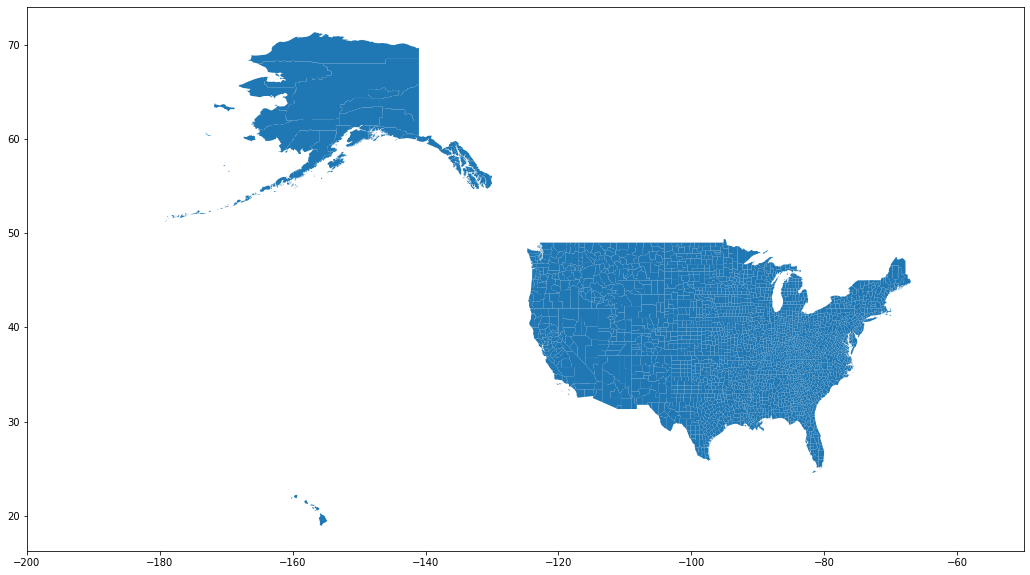

In [ ]:
# Visualize US 50 states county map
us_states_county_map_df.plot(figsize=(20, 10))

# Cut off part of Alaska's Aleutian Islands for sake of reasonably sized and scaled visualization
plt.xlim([-200, -50])

In [ ]:
# Join food_full_df dataframe (with County Name in title case) and us_states_county_map_df dataframe
food_full_df['County Name'] = food_full_df['County'].apply(lambda x: x.title())
food_map_df = us_states_county_map_df.merge(right=food_full_df[['State', 'County Name', 'Food Insecurity Percentage']], how='right', left_on=['STUSPS', 'NAME'], right_on=['State', 'County Name'])

(-200.0, -50.0)

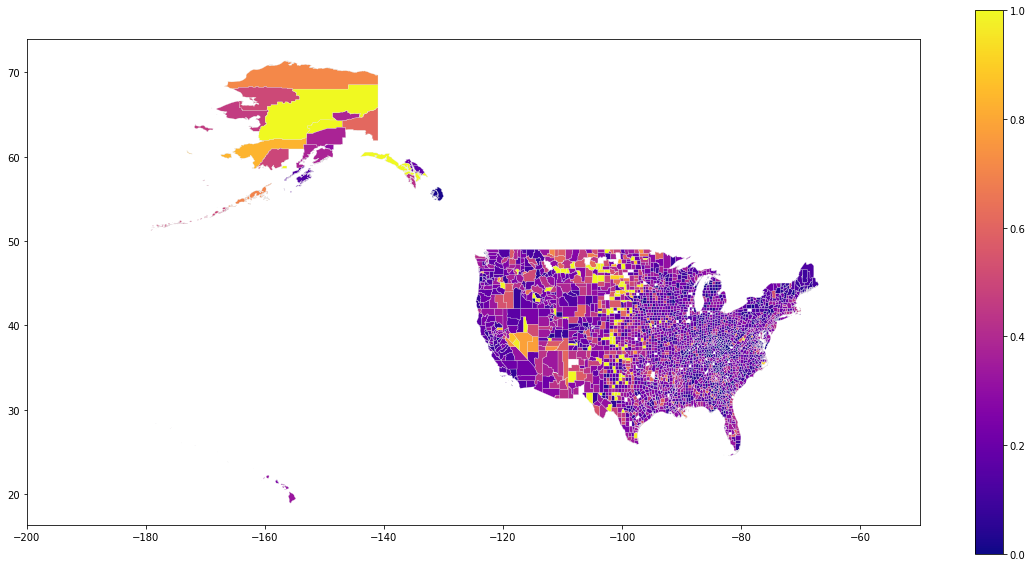

In [139]:
# Visualize merged dataframe, color-coded by 'Hospital overall rating'
fig, ax = plt.subplots(1, figsize=(20,10))
food_map_df.plot(column='Food Insecurity Percentage', cmap='plasma', linewidth=0.25, ax=ax, edgecolor='0.9', legend = True)
plt.xlim([-200, -50])